In [1]:
! pip3 install scikit-learn

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
blac

## Классификация по Naive Bayes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.neighbors import KNeighborsClassifier

# from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
! ls

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [5]:
# Чтение файла.
data = pd.read_csv('sentences_labelled.csv', encoding='utf-8')
data.head(20)

,Type,Sentence
0,fict,"- ""наемка"" у нас нынче отличная... ""наемка"" в..."
1,sci,"– «айтуарская степь», расейкин и.и."
2,sci,– «ащисайская степь») и другими сотрудниками б...
3,sci,"– «буртинская степь», касымов м.с."
4,sci,"– «таловская степь», немальцев д.г.– «предурал..."
5,fict,"- а может, это по степи гуляет купец, что тут ..."
6,sci,– в кустарниковом; по мере удаления от водоток...
7,fict,- вольная степь.
8,fict,"- д-а-а... степь-матушка, - говорит один из ни..."
9,fict,- значит тревога... я еще помню... мальчишка б...


In [6]:
# data.shape

(2628, 2)

### Визуализация процентного распределения по типам

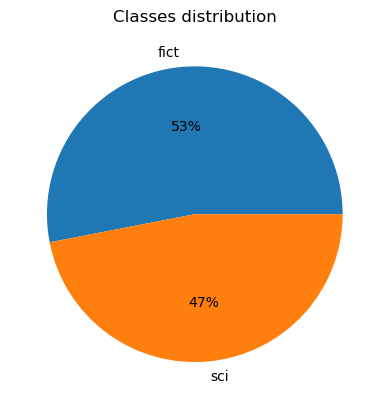

In [9]:
classes = pd.value_counts(data["Type"])
classes
classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')
plt.show()

### Подготовка данных для модели

Давайте найдем частоты слов в сообщениях (отдельно для подкорпуса спама и не-спама). Для будущего алгоритма, слова будут признаками (features)

Для этого используем Counter из collections.

In [11]:
# Counter(" ".join(data[data['Type']=='sci']["Sentence"]).split()).most_common(30) 

[('в', 1334),
 ('и', 1165),
 ('на', 820),
 ('степь»', 431),
 ('участке', 291),
 ('–', 282),
 ('с', 273),
 ('по', 245),
 ('«буртинская', 209),
 ('степной', 160),
 ('г.', 156),
 ('участка', 151),
 ('степных', 145),
 ('«айтуарская', 142),
 ('к', 128),
 ('«ащисайская', 127),
 ('для', 126),
 ('что', 120),
 ('не', 118),
 ('а', 117),
 ('степи', 112),
 ('степь».', 109),
 ('заповедника', 109),
 ('степного', 101),
 ('степь»,', 99),
 ('«таловская', 99),
 ('как', 95),
 ('их', 76),
 ('до', 75),
 ('при', 73)]

In [13]:
# определение частот слов в предложениях для разных типов и выбор 20 наиболее частотных
count1 = Counter(" ".join(data[data['Type']=='sci']["Sentence"]).split()).most_common(20) 
df1 = pd.DataFrame.from_dict(count1) # датафрейм с частотами для типа sci
df1 = df1.rename(columns={0: "words in sci", 1 : "count"})

count2 = Counter(" ".join(data[data['Type']=='fict']["Sentence"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2) # датафрейм с частотами для типа fict
df2 = df2.rename(columns={0: "words in fict", 1 : "count"})

display(df1,df2)

,words in sci,count
0,в,1334
1,и,1165
2,на,820
3,степь»,431
4,участке,291
5,–,282
6,с,273
7,по,245
8,«буртинская,209
9,степной,160


,words in fict,count
0,и,1788
1,в,1299
2,на,774
3,не,461
4,с,433
5,по,377
6,как,287
7,а,271
8,—,256
9,степи,241


In [17]:
# очитска от стоп-слов
import nltk
from nltk.corpus import stopwords
st = stopwords.words('russian')

In [18]:
f = feature_extraction.text.CountVectorizer(stop_words = st)
# type(f)

In [15]:
# data["Sentence"]

0       - "наемка" у нас нынче отличная...  "наемка" в...
1                     – «айтуарская степь», расейкин и.и.
2       – «ащисайская степь») и другими сотрудниками б...
3                      – «буртинская степь», касымов м.с.
4       – «таловская степь», немальцев д.г.– «предурал...
                              ...                        
2623    я, уходя из казарм, просил его, чтобы он заход...
2624    являются ли кустарниковые сообщества индикатор...
2625    языческий этот, едва прирученный огонь в темно...
2626    яицкое казачье войско, сложившееся на степном ...
2627    японцы же похожи на ящериц в степи: противные,...
Name: Sentence, Length: 2628, dtype: object

### Обучение модели

In [19]:
X = f.fit_transform(data["Sentence"]) # выучить обучающие данные и вернуть матрица "документ х термин" для всего датасета
# print(f.get_feature_names()[1000:1100]) # признаки

# display(X.shape)
display(X.toarray())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# Замена типов на числа
data["Type"]=data["Type"].map({'fict':1,'sci':0})
data

,Type,Sentence
0,1,"- ""наемка"" у нас нынче отличная... ""наемка"" в..."
1,0,"– «айтуарская степь», расейкин и.и."
2,0,– «ащисайская степь») и другими сотрудниками б...
3,0,"– «буртинская степь», касымов м.с."
4,0,"– «таловская степь», немальцев д.г.– «предурал..."
...,...,...
2623,1,"я, уходя из казарм, просил его, чтобы он заход..."
2624,0,являются ли кустарниковые сообщества индикатор...
2625,1,"языческий этот, едва прирученный огонь в темно..."
2626,1,"яицкое казачье войско, сложившееся на степном ..."


In [21]:
# деление датаерйма на обучающую и тестовую части
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data["Type"], test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)
sum(y_train == 1)

(2102, 21518) (526, 21518)


1118

In [22]:
# Multinomial NB
list_alpha = np.arange(1/100000, 20, 0.11) # список равномерно распределенных значений от 1/100000 до 20

score_train = np.zeros(len(list_alpha)) # пустые списки по длине изначального списка
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

In [23]:
# list_alpha

array([1.000000e-05, 1.100100e-01, 2.200100e-01, 3.300100e-01,
       4.400100e-01, 5.500100e-01, 6.600100e-01, 7.700100e-01,
       8.800100e-01, 9.900100e-01, 1.100010e+00, 1.210010e+00,
       1.320010e+00, 1.430010e+00, 1.540010e+00, 1.650010e+00,
       1.760010e+00, 1.870010e+00, 1.980010e+00, 2.090010e+00,
       2.200010e+00, 2.310010e+00, 2.420010e+00, 2.530010e+00,
       2.640010e+00, 2.750010e+00, 2.860010e+00, 2.970010e+00,
       3.080010e+00, 3.190010e+00, 3.300010e+00, 3.410010e+00,
       3.520010e+00, 3.630010e+00, 3.740010e+00, 3.850010e+00,
       3.960010e+00, 4.070010e+00, 4.180010e+00, 4.290010e+00,
       4.400010e+00, 4.510010e+00, 4.620010e+00, 4.730010e+00,
       4.840010e+00, 4.950010e+00, 5.060010e+00, 5.170010e+00,
       5.280010e+00, 5.390010e+00, 5.500010e+00, 5.610010e+00,
       5.720010e+00, 5.830010e+00, 5.940010e+00, 6.050010e+00,
       6.160010e+00, 6.270010e+00, 6.380010e+00, 6.490010e+00,
       6.600010e+00, 6.710010e+00, 6.820010e+00, 6.9300

In [24]:
for alpha in list_alpha: 
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # вызов модели
    bayes.fit(X_train, y_train) # тренировка модели
    
    score_train[count] = bayes.score(X_train, y_train) # итерация по индексу в списке, добавление значений accuracy
    # score_train
    
    score_test[count]= bayes.score(X_test, y_test)
    # score_test
    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 # после одной итерации, делаем новый шаг

In [25]:
# 10 лучших моделей
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
matrix
models = pd.DataFrame(data = matrix,
                      columns = ['alpha',
                                 'Train Accuracy',
                                 'Test Accuracy',
                                 'Test Recall',
                                 'Test Precision'])

display(models.head(10))
display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998573,0.979087,0.971014,0.988930
1,0.11001,0.998573,0.979087,0.967391,0.992565
2,0.22001,0.998573,0.977186,0.963768,0.992537
3,0.33001,0.998573,0.975285,0.960145,0.992509
4,0.44001,0.998097,0.979087,0.963768,0.996255
5,0.55001,0.998097,0.980989,0.963768,1.000000
6,0.66001,0.998097,0.980989,0.963768,1.000000
7,0.77001,0.997621,0.980989,0.963768,1.000000
8,0.88001,0.997621,0.980989,0.963768,1.000000
9,0.99001,0.997146,0.979087,0.960145,1.000000


(182, 5)

In [26]:
# выбор модели с наивысшим значением precision
best_index = models['Test Precision'].idxmax()
best_index

# # display(best_index)

display(models.iloc[best_index])

alpha             0.550010
Train Accuracy    0.998097
Test Accuracy     0.980989
Test Recall       0.963768
Test Precision    1.000000
Name: 5, dtype: float64

In [27]:
# выбор модели со 100% precision и наивысшим accuracy (она оказалась лучшей уже в предыдущей ячейке)
# best_index = models[models['Test Precision']>0.9]['Test Accuracy'].idxmax()
# best_index

# models.iloc[best_index]

alpha             0.550010
Train Accuracy    0.998097
Test Accuracy     0.980989
Test Recall       0.963768
Test Precision    1.000000
Name: 5, dtype: float64

In [28]:
# предсказание
bayes = naive_bayes.MultinomialNB(alpha= 2.2) # используем лучшую модель
bayes.fit(X_train, y_train) # тренируем алгоритм на данных

y_pred = bayes.predict(X_test) # метод для предсказания

# сделаем датафрейм с колонками для настоящего класса и для предсказанного

new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

,Type,predicted
686,1,1
453,0,0
696,1,1
633,1,1
166,1,1
...,...,...
316,0,0
836,0,0
2210,1,1
2491,0,0


In [30]:
# построение матрицы ошибок, начинается с True Negative (False Positive - 2, False Negative - 15) 
m_confusion_test = metrics.confusion_matrix(y_test, y_pred)


pd.DataFrame(data = m_confusion_test, columns = ['Predicted sci', 'Predicted fict'],
            index = ['Actual sci', 'Actual fict'])

,Predicted sci,Predicted fict
Actual sci,248,2
Actual fict,15,261


### На новом датасете

In [43]:
import re
from nltk.tokenize import sent_tokenize

In [54]:
with open('voprosy_stepevedeniya.txt', "r", encoding='utf-8') as open_file:
    new_text = open_file.read() # чтение файла
    new_text = new_text.lower() # приведение к нижнему регистру
    new_text = new_text.replace("\n", " ") # удаление лишних символов
    new_text = new_text.replace("\xa0", "") # удаление лишних символов
    new_text = new_text.replace("\t\t", "")
    new_text = new_text.replace("\t", "")

In [55]:
sents = [] #список предложений со словом степь и его производными
sentence = sent_tokenize(new_text)
for j in sentence:
    result = re.search(r'[С,с]теп[ьиян].{0,2}|[С,с]тепей', j)
    if not result == None:
        sents.append(j) # finding sentences with a target word and its derivatives and adding target sentences into the list 
# sents[0:20]

['этногеография и топонимика степного региона юга молдовы / бессарабии д.д.',
 'лозовану юг молдовы, известный и как южная бессарабия или буджак, является в большей части степным регионом с противоречивым этноисторическим прошлым.',
 'в физико-географическом плане этот регион определяется как степная область юга молдовы, составляя около 20% территории республики молдова и более 90% территории юга бессарабии в одесской области.',
 'регион известен и под названием буджак, который ассоциируется со степной растительностью и типичным степным ландшафтом, являясь западной частью евразиатской степной области [1].',
 'в направлении с севера на юг, по мере нарастания аридности климата и ксерофитности растительного покрова зона делится на подзоны луговых степей и остепненных лугов, разнотравно-типчаково-ковыльных степей и пустынных полынно-типчаково-ковыльных степей [2].',
 'этот регион входит в причерноморскую степную провинцию.',
 'южная бессарабия является частью огромного коридора великих миг

In [48]:
len(sents)

215

In [56]:
val = 0
size = len(sents)
a = [val] * size
df_a = pd.DataFrame(a)
df_a.columns = ['Type']
df_a

,Type
0,0
1,0
2,0
3,0
4,0
...,...
210,0
211,0
212,0
213,0


In [57]:
df_sents = pd.DataFrame(sents)
df_sents.columns = ['Sentence']
df_sents

,Sentence
0,этногеография и топонимика степного региона юг...
1,"лозовану юг молдовы, известный и как южная бес..."
2,в физико-географическом плане этот регион опре...
3,"регион известен и под названием буджак, которы..."
4,"в направлении с севера на юг, по мере нарастан..."
...,...
210,5.выразить озабоченность судьбой заповедника «...
211,6.инициировать разработку научных основ сбалан...
212,7.провести всероссийское совещание с междунаро...
213,9.усилить взаимодействие и кураторство с руков...


In [58]:
df_new = df_a.join(df_sents)
df_new

,Type,Sentence
0,0,этногеография и топонимика степного региона юг...
1,0,"лозовану юг молдовы, известный и как южная бес..."
2,0,в физико-географическом плане этот регион опре...
3,0,"регион известен и под названием буджак, которы..."
4,0,"в направлении с севера на юг, по мере нарастан..."
...,...,...
210,0,5.выразить озабоченность судьбой заповедника «...
211,0,6.инициировать разработку научных основ сбалан...
212,0,7.провести всероссийское совещание с междунаро...
213,0,9.усилить взаимодействие и кураторство с руков...


In [ ]:
df_y_test = df_new

## Нерешенный вопрос: как дать модели совсем новый датасет

In [59]:
# y_pred = bayes.predict(df_new) # метод для предсказания

# # сделаем датафрейм с колонками для настоящего класса и для предсказанного

# new_df2 = pd.DataFrame(data = df_y_test)
# new_df2["predicted"]=bayes.predict(df_new) # добавляем новую колонку с предсказаниями

# new_df2

ValueError: could not convert string to float: 'этногеография и топонимика степного региона юга молдовы / бессарабии д.д.'

# Support Vector Machines

In [33]:
list_C = np.arange(500, 2000, 100) #100000

score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [34]:
# 10 первых моделей и их метрики
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.939163,0.98913,0.903974
1,600.0,1.0,0.939163,0.98913,0.903974
2,700.0,1.0,0.939163,0.98913,0.903974
3,800.0,1.0,0.939163,0.98913,0.903974
4,900.0,1.0,0.939163,0.98913,0.903974
5,1000.0,1.0,0.939163,0.98913,0.903974
6,1100.0,1.0,0.939163,0.98913,0.903974
7,1200.0,1.0,0.939163,0.98913,0.903974
8,1300.0,1.0,0.939163,0.98913,0.903974
9,1400.0,1.0,0.939163,0.98913,0.903974


In [35]:
# модель с наивысшим test precision
best_index = models['Test Precision'].idxmax()

display(models.iloc[best_index, :])

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.939163
Test Recall         0.989130
Test Precision      0.903974
Name: 0, dtype: float64

In [37]:
# модели с почти 100% Precision

models[models['Test Precision']>0.9].head(5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.939163,0.98913,0.903974
1,600.0,1.0,0.939163,0.98913,0.903974
2,700.0,1.0,0.939163,0.98913,0.903974
3,800.0,1.0,0.939163,0.98913,0.903974
4,900.0,1.0,0.939163,0.98913,0.903974


In [38]:
best_index = models[models['Test Precision']>0.9]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.939163
Test Recall         0.989130
Test Precision      0.903974
Name: 0, dtype: float64

## Вопрос: где само предсказание?

In [39]:
# матрица ошибок для SVM
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,221,29
Actual 1,3,273
